The silhouette score is a metric used in clustering to evaluate how well-separated clusters are. It measures how similar each data point is to its own cluster compared to other clusters, with scores ranging from -1 to +1. A high score indicates that the data point is well-matched to its cluster and poorly matched to neighboring clusters, while a negative score suggests a potential misclassification

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv("iris.csv")
dataset.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [3]:
dataset.drop(columns="variety",inplace=True)

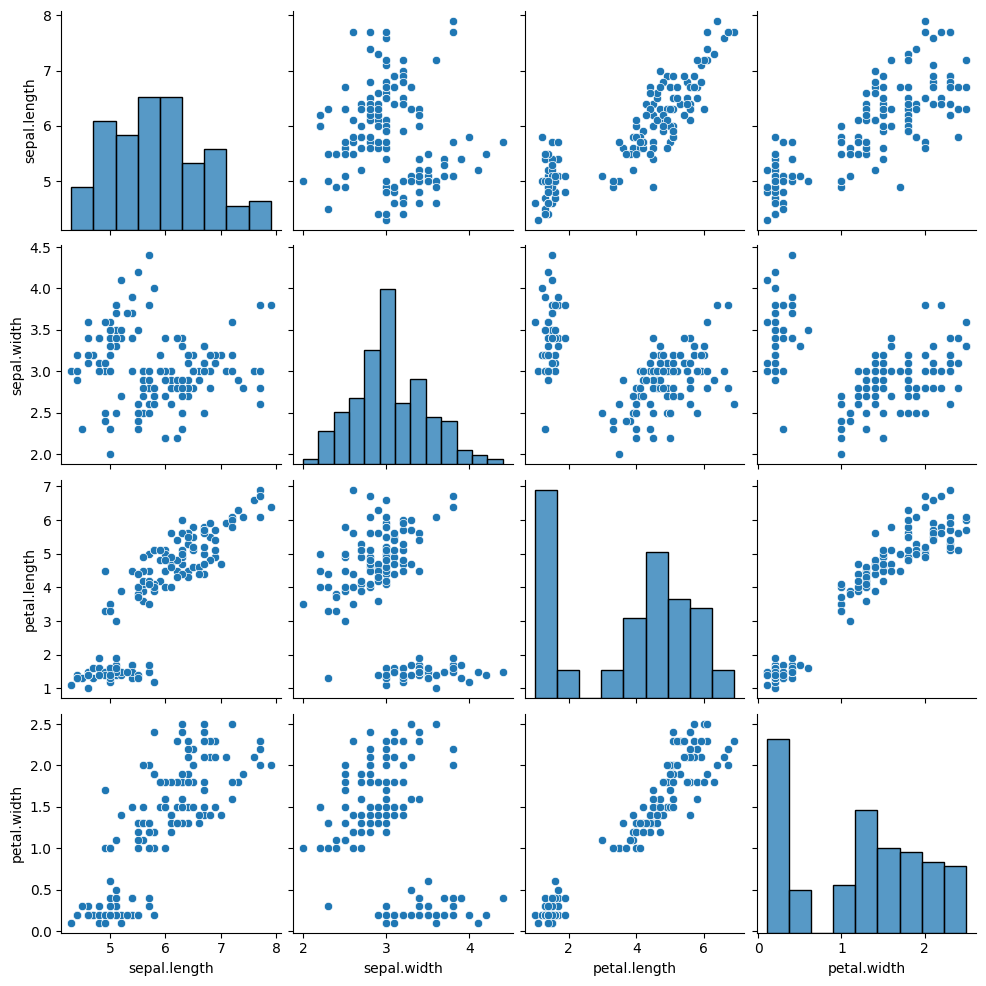

In [4]:
sns.pairplot(data=dataset)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []

for i in range(2,21):
    km = KMeans(n_clusters=i,init="k-means++")
    km.fit(dataset)
    wcss.append(km.inertia_)

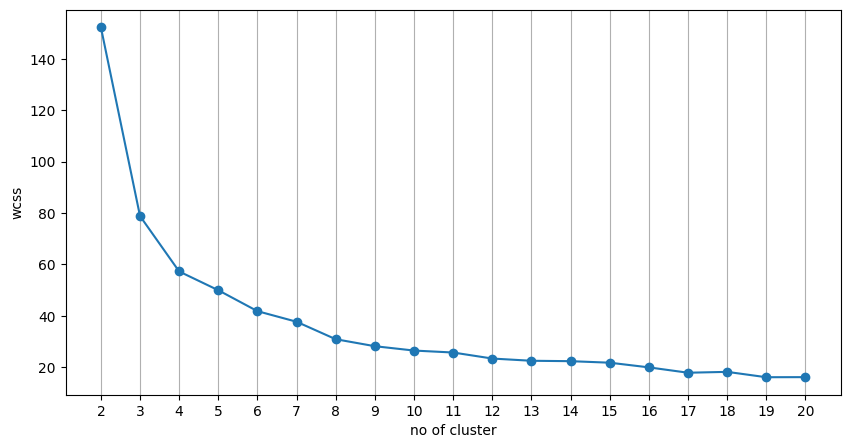

In [9]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker="o")
plt.xticks([i for i in range(2,21)])
plt.xlabel("no of cluster")
plt.grid(axis="x")
plt.ylabel("wcss")
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

In [10]:
kmn = KMeans(n_clusters=3)
dataset["Predict"]=kmn.fit_predict(dataset)

In [13]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [15]:
silhouette_score(dataset,labels=kmn.labels_)

0.6851559988597147

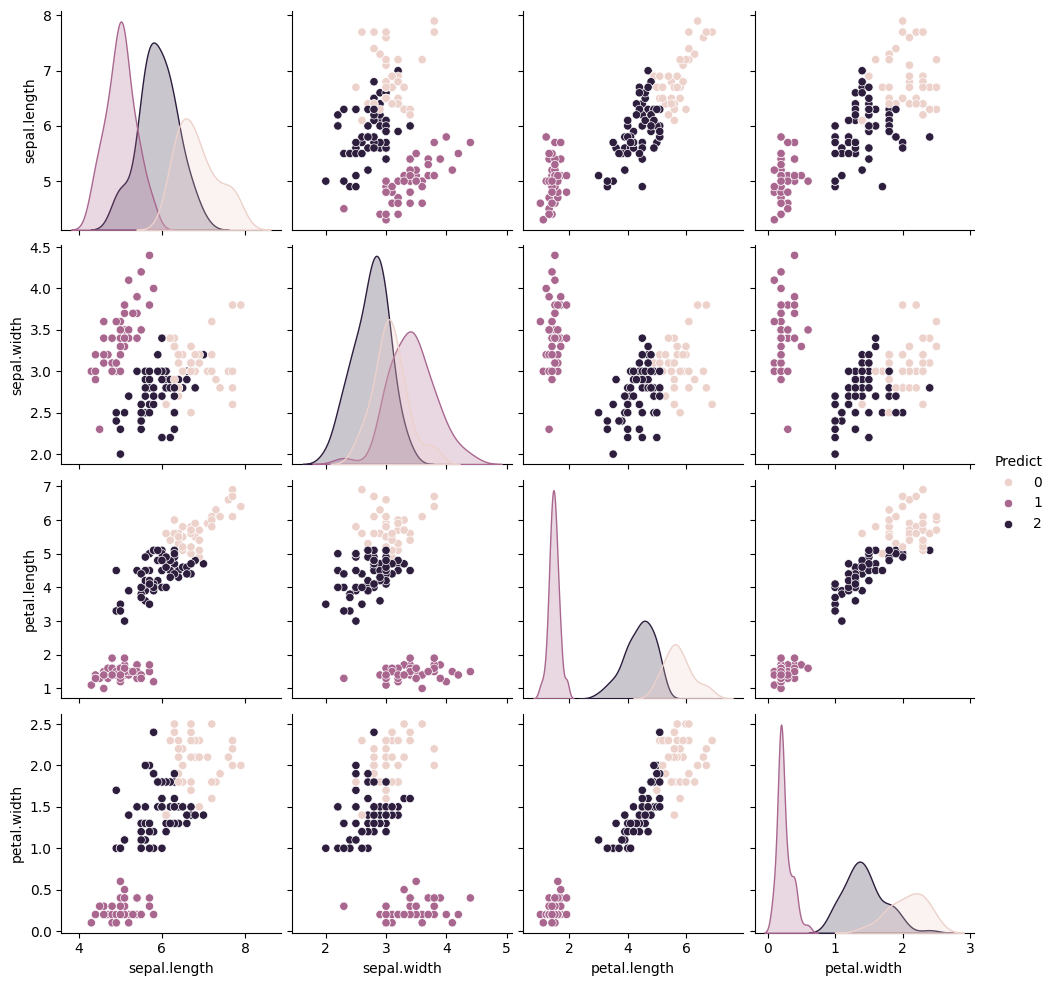

In [16]:
sns.pairplot(data=dataset,hue="Predict")
plt.show()

In [21]:
ss = []
no_c = [j for j in range(2,21)]

for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset,km1.labels_))

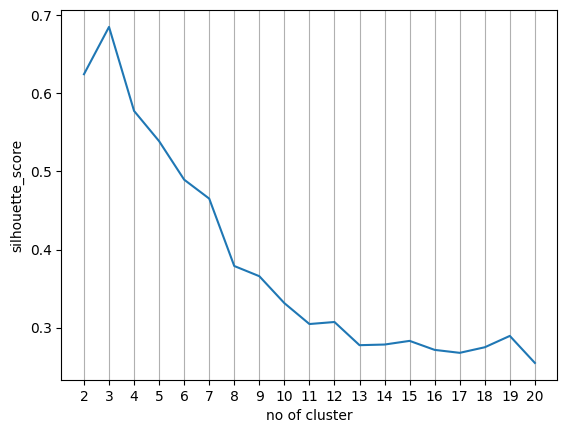

In [22]:
plt.plot(no_c,ss)
plt.xlabel("no of cluster")
plt.ylabel("silhouette_score")
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()